<a href="https://colab.research.google.com/github/verma-saloni/Thesis-Work/blob/main/Hybrid_KNN_model_for_Gossipcop_Epochs_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
# First we import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
import tensorflow as tf

main source for knn https://www.kaggle.com/pathumveyron24/hybrid-model-sherlock-fakenewsnet/notebook


In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fake 0
Real 1

In [170]:
df_fake = pd.read_csv('/content/drive/MyDrive/gossipcop_fake.csv')
df_real = pd.read_csv('/content/drive/MyDrive/gossipcop_real.csv')
df_fake['labelML']=0
df_real['labelML']=1

df_fake.count()


id           5323
news_url     5067
title        5323
tweet_ids    5135
labelML      5323
dtype: int64

In [171]:
#df= df_fake.head(10).append(df_real.head(10))
news= df_fake.append(df_real)
news.reset_index(drop=True, inplace=True)

In [172]:
news.head()

id                                           news_url  \
0  gossipcop-2493749932  www.dailymail.co.uk/tvshowbiz/article-5874213/...   
1  gossipcop-4580247171  hollywoodlife.com/2018/05/05/paris-jackson-car...   
2   gossipcop-941805037  variety.com/2017/biz/news/tax-march-donald-tru...   
3  gossipcop-2547891536  www.dailymail.co.uk/femail/article-3499192/Do-...   
4  gossipcop-5476631226  variety.com/2018/film/news/list-2018-oscar-nom...   

                                               title  \
0  Did Miley Cyrus and Liam Hemsworth secretly ge...   
1  Paris Jackson & Cara Delevingne Enjoy Night Ou...   
2  Celebrities Join Tax March in Protest of Donal...   
3  Cindy Crawford's daughter Kaia Gerber wears a ...   
4      Full List of 2018 Oscar Nominations – Variety   

                                           tweet_ids  labelML  
0  284329075902926848\t284332744559968256\t284335...        0  
1  992895508267130880\t992897935418503169\t992899...        0  
2  853359353532829696\t853359576543920128\t853359...        0  
3  988821905196158981\t988824206556172288\t988825...        0  
4  955792793632432131\t955795063925301249\t955798...        0

In [173]:
news = news.drop(['tweet_ids', 'news_url','id'], axis=1)
news.count()

title      22140
labelML    22140
dtype: int64

In [174]:
news

title  labelML
0      Did Miley Cyrus and Liam Hemsworth secretly ge...        0
1      Paris Jackson & Cara Delevingne Enjoy Night Ou...        0
2      Celebrities Join Tax March in Protest of Donal...        0
3      Cindy Crawford's daughter Kaia Gerber wears a ...        0
4          Full List of 2018 Oscar Nominations – Variety        0
...                                                  ...      ...
22135  2017 Hollywood Film Awards: The Complete List ...        1
22136  Jada Pinkett Smith explains why son Jaden move...        1
22137  Tinsley Mortimer Reacts to Luann de Lesseps' R...        1
22138  Prince Harry Carries on Princess Diana’s Legac...        1
22139  Kylie Jenner is actually terrified of butterflies        1

[22140 rows x 2 columns]

In [175]:
news.dtypes

title      object
labelML     int64
dtype: object

In [176]:
news['labelML'] = news['labelML'].fillna(0).astype(np.int64)

In [177]:
news.dtypes

title      object
labelML     int64
dtype: object

In [178]:
news.count()

title      22140
labelML    22140
dtype: int64

In [179]:
news.head()

title  labelML
0  Did Miley Cyrus and Liam Hemsworth secretly ge...        0
1  Paris Jackson & Cara Delevingne Enjoy Night Ou...        0
2  Celebrities Join Tax March in Protest of Donal...        0
3  Cindy Crawford's daughter Kaia Gerber wears a ...        0
4      Full List of 2018 Oscar Nominations – Variety        0

In [180]:
import nltk
nltk.download('stopwords')

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [181]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
news['title']= news['title'].apply(denoise_text)


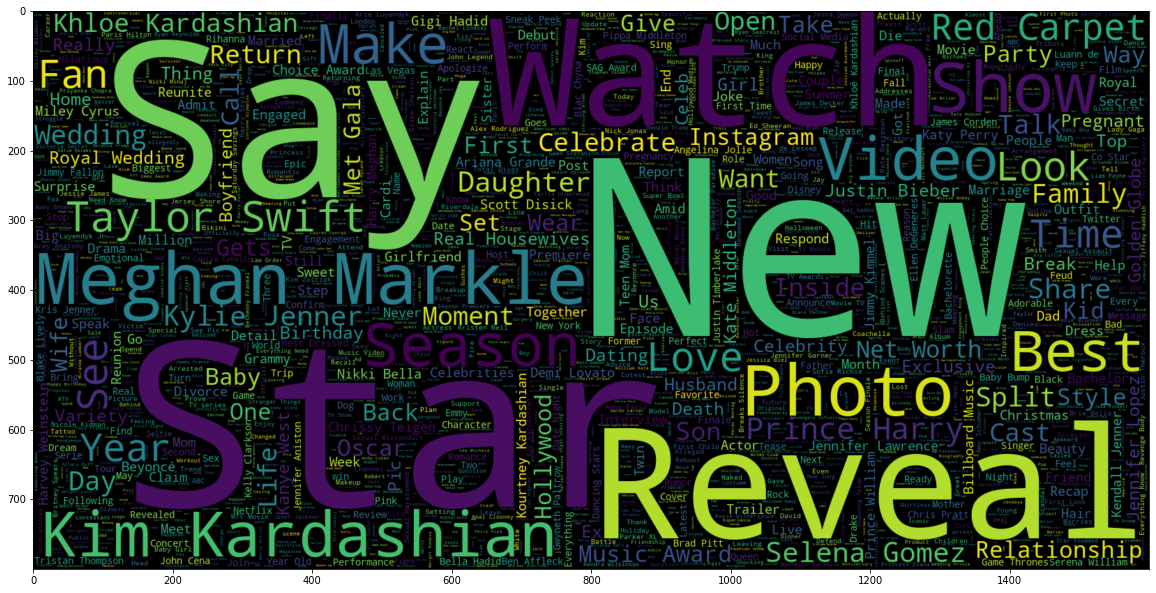

In [182]:
#WORDCLOUD FOR REAL TEXT (LABEL - 1)
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.labelML == 1].title))
plt.imshow(wc , interpolation = 'bilinear')

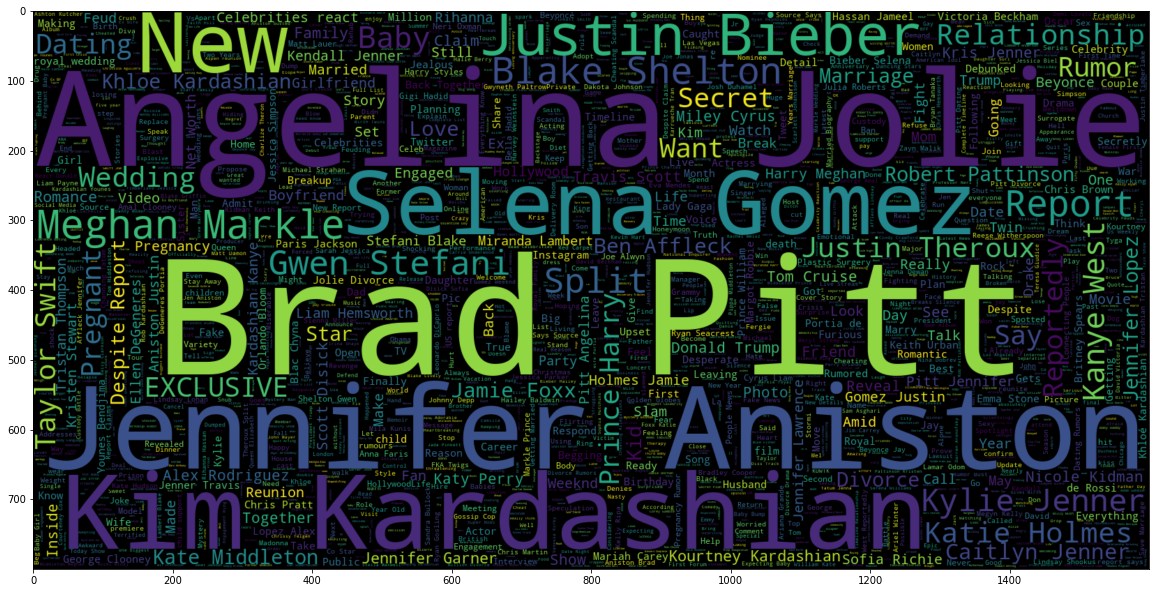

In [183]:
#WORDCLOUD FOR Fake TEXT (LABEL - 0)
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.labelML == 0].title))
plt.imshow(wc , interpolation = 'bilinear')

In [198]:
#Splitting the data into 2 parts - training and testing data
x_train,x_test,y_train,y_test = train_test_split(news.title,news.labelML,test_size=0.1,random_state=42)
max_features = 22000
maxlen = 300

In [199]:
#Tokenizing Text -> Repsesenting each word by a number
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [200]:
tokenizer.get_config()

{'char_level': False,
 'document_count': 19926,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"1025": 31, "213": 118, "2596": 11, "793": 39, "1802": 17, "105": 187, "991": 32, "617": 49, "643": 47, "33": 331, "16": 447, "66": 238, "29": 359, "15": 493, "331": 85, "14": 508, "7": 596, "11101": 1, "4066": 6, "1302": 24, "441": 64, "1803": 17, "3": 718, "343": 83, "6375": 3, "3022": 9, "1096": 29, "11102": 1, "11104": 1, "898": 34, "214": 118, "2012": 14, "11103": 1, "2434": 12, "11105": 1, "6376": 3, "161": 140, "180": 131, "11107": 1, "11106": 1, "8": 599, "479": 62, "794": 39, "11108": 1, "6377": 3, "225": 114, "402": 74, "535": 56, "644": 47, "2790": 10, "30": 353, "11109": 1, "763": 40, "992": 32, "121": 164, "38": 304, "120": 165, "6378": 3, "1898": 16, "318": 88, "89": 203, "1303": 24, "1097": 28, "228": 112, "2791": 10, "605": 50, "297": 89, "8004": 2, "277": 97, "442": 68, "155": 142, "446": 67, "12": 530, "5305": 4, "489": 59, "381": 77, "5306": 4, "744": 

In [201]:
max(tokenizer.word_index.values())

21999

In [202]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [203]:
#Glove
EMBEDDING_FILE = '/content/drive/MyDrive/glove.6B.50d.txt'

In [204]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [205]:
len(embeddings_index['question'])

50

from tensorflow.python.ops.array_ops import zeros
from pandas.core.arrays.sparse import array
1. form an empty list, holds embedding confusion_matrix
.. add empty array to array of zeros- padding token
2. iterate from smaller toekn no to biggest token no 0....n, token[0]=empty array
3. for each no, find what is the word and look it up in the all_embs, then append to embedding emb matrix


In [206]:
emb_matrix=list()
emb_matrix.append(np.zeros(50,dtype=np.float32))
for i in range(1,max(tokenizer.word_index.values())+1):
  word = tokenizer.index_word[i]
  if word not in embeddings_index:
    emb_matrix.append(np.zeros(50,dtype=np.float32))
  else: 
    emb_matrix.append(embeddings_index[word]) 

In [ ]:
emb_matrix

In [207]:
print(type(emb_matrix[0]) )

<class 'numpy.ndarray'>


In [208]:
emb_matrix[1]

array([-0.077008,  1.0279  ,  0.67351 ,  0.83698 , -0.14577 ,  0.082115,
        0.39797 ,  0.65602 , -1.4389  ,  0.25202 , -0.86764 ,  0.51676 ,
       -0.78262 , -0.11189 ,  0.44709 ,  0.7691  , -0.50129 , -0.16115 ,
        1.391   ,  0.89516 ,  0.57705 ,  0.55203 ,  0.12263 , -0.20457 ,
       -0.39842 , -0.25943 , -0.51151 , -0.2129  , -0.028049, -0.82824 ,
       -1.1416  , -0.54732 ,  0.41298 , -0.41629 ,  0.57456 ,  0.29751 ,
       -0.12061 , -0.095328, -0.53425 , -0.81437 ,  0.25521 , -0.27415 ,
       -0.029786, -0.026927,  0.90408 , -1.4264  ,  0.25317 , -0.3998  ,
       -0.2353  ,  0.72512 ], dtype=float32)

In [209]:
batch_size = 256
epochs = 35
embed_size = 50
tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)

per_process_gpu_memory_fraction: 0.333

In [210]:
#with Gabriel
#Defining Neural Network
# model = Sequential()
#Non-trainable embeddidng layer
# model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
# model.add(LSTM(units=128 , return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=64))
# model.add(Dropout(0.1))
# model.add(Dense(units = 32 , activation = 'relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
emb_matrix2 = np.array(emb_matrix)
#Hybrid Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, output_dim=embed_size, weights=[emb_matrix2],trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [211]:
model.compile(loss='mae',optimizer='Adam',metrics=['accuracy'])

In [212]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 50)          1100000   
                                                                 
 dropout_27 (Dropout)        (None, None, 50)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, None, 128)         32128     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 lstm_18 (LSTM)              (None, None, 20)          11920     
                                                                 
 lstm_19 (LSTM)              (None, 20)                3280      
                                                      

In [213]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test, y_test), epochs=epochs)


Epoch 1/35
78/78 [==============================] - 11s 73ms/step - loss: 0.2544 - accuracy: 0.7594 - val_loss: 0.2489 - val_accuracy: 0.7511
Epoch 2/35
78/78 [==============================] - 4s 55ms/step - loss: 0.2395 - accuracy: 0.7605 - val_loss: 0.2489 - val_accuracy: 0.7511
Epoch 3/35
78/78 [==============================] - 4s 49ms/step - loss: 0.2395 - accuracy: 0.7605 - val_loss: 0.2489 - val_accuracy: 0.7511
Epoch 4/35
78/78 [==============================] - 3s 45ms/step - loss: 0.2395 - accuracy: 0.7605 - val_loss: 0.2489 - val_accuracy: 0.7511
Epoch 5/35
78/78 [==============================] - 3s 45ms/step - loss: 0.2395 - accuracy: 0.7605 - val_loss: 0.2489 - val_accuracy: 0.7511
Epoch 6/35
78/78 [==============================] - 3s 44ms/step - loss: 0.2395 - accuracy: 0.7605 - val_loss: 0.2489 - val_accuracy: 0.7511
Epoch 7/35
78/78 [==============================] - 3s 44ms/step - loss: 0.2395 - accuracy: 0.7605 - val_loss: 0.2489 - val_accuracy: 0.7511
Epoch 8/35
7

In [214]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train))


623/623 [==============================] - 9s 15ms/step - loss: 0.2395 - accuracy: 0.7605
Accuracy of the model on Training Data is -  [0.23948609828948975, 0.7605139017105103]


In [215]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

70/70 [==============================] - 1s 16ms/step - loss: 0.2489 - accuracy: 0.7511
Accuracy of the model on Testing Data is -  75.1129150390625


In [216]:
epochs

35

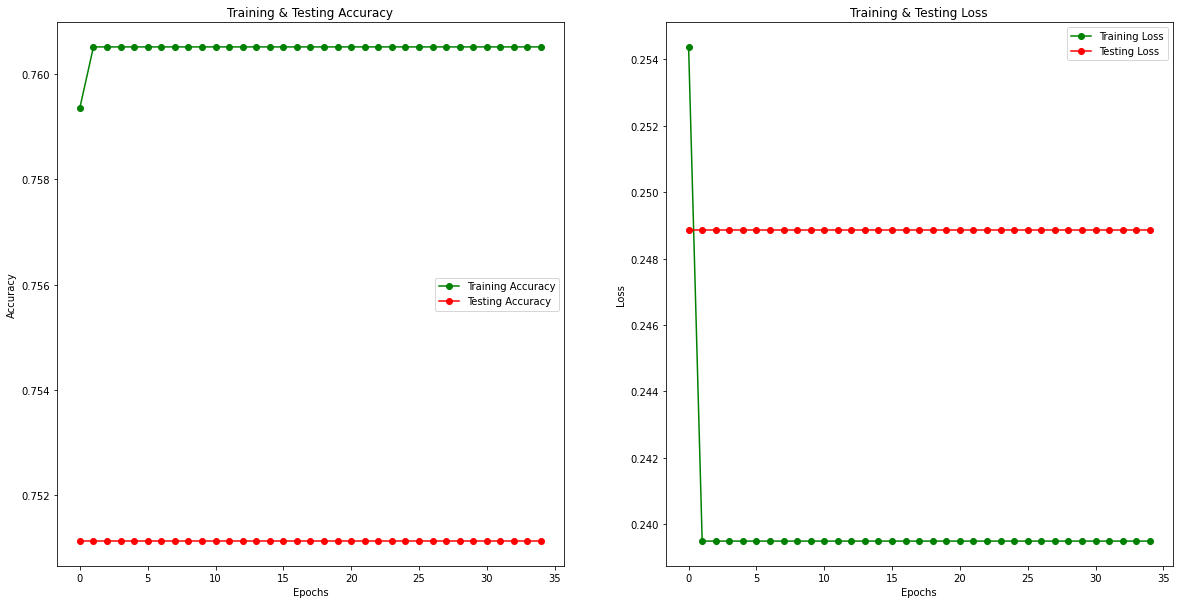

In [217]:
epoch_list = [i for i in range(0,epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epoch_list , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epoch_list , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epoch_list , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epoch_list , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [218]:
!pip install np_utils
from keras.utils.np_utils import to_categorical

In [219]:
pred = model.predict(x_train)
pred_classes = tf.keras.utils.to_categorical(pred)
pred_test = model.predict(X_test)
pred_test_classes = tf.keras.utils.to_categorical(pred_test)

In [220]:
from collections import Counter


print(Counter(y_test).keys()) # equals to list(set(words))
print(Counter(y_test).values())

dict_keys([1, 0])
dict_values([1663, 551])


Add confusion matrix, fix type of classes.

In [221]:
sentence = ["All the universities and schools remain closed for two months due to the corona virus outbreak in the country."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = sequence.pad_sequences(sequences, maxlen=maxlen)
model_decision = model.predict(padded)
print(model_decision)

[[1.]]


In [222]:
tf.keras.utils.to_categorical(model_decision)

array([[0., 1.]], dtype=float32)

Predicts 1, ie Real. Probable news source is good.


In [223]:
sentence1 = ["leeee keen to nooo where leaves"]
sequences1 = tokenizer.texts_to_sequences(sentence)
padded1 = sequence.pad_sequences(sequences1, maxlen=maxlen)
model_decision1 = model.predict(padded1)
print(model_decision1)

[[1.]]


In [224]:
tf.keras.utils.to_categorical(model_decision1)

array([[0., 1.]], dtype=float32)

Probably has a tendency to predict more real, overfitting? check.